In [266]:
import math
import random
import matplotlib.pyplot as plt
import torch
K = 2 # Input vector dimension


# Global variables for A, B, C, and x
global A, B, C, x
A = [[random.random() for _ in range(K)] for _ in range(K)]
B = [[random.random() for _ in range(K)] for _ in range(K)]
C = [[random.random() for _ in range(K)] for _ in range(K)]
x = [random.random() for _ in range(K)]

# Sigmoid function and its derivative
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))
    
def sigmoid_matrix(y):
    return [sigmoid(yi) for yi in y]
# Matrix operations
def matrix_vector_multiplication(matrix, vector):
    return [sum(matrix[i][j] * vector[j] for j in range(len(vector))) for i in range(len(matrix))]

def matrix_scalar_multiplication(matrix, scalar):
    return [[matrix[i][j] * scalar for j in range(len(matrix[0]))] for i in range(len(matrix))]

def matrix_addition(matrix1, matrix2):
    return [[matrix1[i][j] + matrix2[i][j] for j in range(len(matrix1[0]))] for i in range(len(matrix1))]

# Forward propagation
def forward_propagation(x, A, B, C):
    y = matrix_vector_multiplication(A,x)
    u = sigmoid_matrix(y)
    v = matrix_vector_multiplication(B,x)
    z = [ui + vi for ui, vi in zip(u, v)]
    w = [sum(C[i][j] * zi for j, zi in enumerate(z)) for i in range(K)]
    L = sum(wi ** 2 for wi in w)
    return z, w, L, u, v, y

# Backpropagation to compute gradients
def compute_gradients(x, A, B, C, z, w, u, v, y):
    dL_dw = [2 * wi for wi in w]
    dL_dz = [sum(C[i][j] * dL_dw[j] for j in range(K)) for i in range(K)]
    dL_du = [dL_dz[i] * sigmoid_derivative(u[i]) for i in range(K)]
    dL_dy = [dL_du[i] * sigmoid_derivative(y[i]) for i in range(K)]

    gradient_A = [[dL_dy[i] * x[j] for j in range(K)] for i in range(K)]
    gradient_B = [[dL_dz[i] * x[j] for j in range(K)] for i in range(K)]
    gradient_C = [[dL_dw[i] * z[j] for j in range(K)] for i in range(K)]

    # gradient_A = [[2 * w[i] * C[i][j] * sigmoid_derivative(Ax + Bx) * x[j] for j in range(len(x))] for i, (Ax, Bx) in enumerate(zip(matrix_vector_multiplication(A, x), matrix_vector_multiplication(B, x)))]
    # gradient_B = [[2 * w[i] * C[i][j] * sigmoid_derivative(Ax + Bx) * x[j] for j in range(len(x))] for i, (Ax, Bx) in enumerate(zip(matrix_vector_multiplication(A, x), matrix_vector_multiplication(B, x)))]
    # gradient_C = [[2 * w[i] * z[j] for j in range(len(z))] for i in range(len(w))]
    return gradient_A, gradient_B, gradient_C

# Gradient descent to minimize the loss
def gradient_descent(A, B, C, gradient_A, gradient_B, gradient_C, learning_rate):
    A_new = matrix_addition(A, matrix_scalar_multiplication(gradient_A, -learning_rate))
    B_new = matrix_addition(B, matrix_scalar_multiplication(gradient_B, -learning_rate))
    C_new = matrix_addition(C, matrix_scalar_multiplication(gradient_C, -learning_rate))
    return A_new, B_new, C_new

# Generate random input vector and matrices A, B, C
# random.seed(42)  # Seed for reproducibility

# A = [[random.random() for _ in range(K)] for _ in range(K)]
# B = [[random.random() for _ in range(K)] for _ in range(K)]
# C = [[random.random() for _ in range(K)] for _ in range(K)]
# x = [random.random() for _ in range(K)]

# Hyperparameters
learning_rate = 0.01
num_epochs = 100

A_manual = A
B_manual = B
C_manual = C
Loss_list=[]
# Display the initial A, B, and C
print("initial A:")
print(A_manual)
print("initial B:")
print(B_manual)
print("initial C:")
print(C_manual)
print("\n")
# Training loop
for epoch in range(num_epochs):
    # Forward propagation
    z, w, L, u, v, y = forward_propagation(x, A_manual, B_manual, C_manual)

    # Backpropagation to compute gradients
    gradient_A, gradient_B, gradient_C = compute_gradients(x, A_manual, B_manual, C_manual, z, w, u, v, y)

    # Gradient descent to update A, B, and C
    A_manual, B_manual, C_manual = gradient_descent(A_manual, B_manual, C_manual, gradient_A, gradient_B, gradient_C, learning_rate)

    # Store the loss value after each epoch
    Loss_list.append(L)

# Display the optimized A, B, and C
print("Optimized A:")
print(A_manual)
print("Optimized B:")
print(B_manual)
print("Optimized C:")
print(C_manual)


initial A:
[[0.19200996978522622, 0.8364834414782254], [0.15094170103852433, 0.11774507631225861]]
initial B:
[[0.11656203838638057, 0.3776997205571929], [0.7156979514694183, 0.3117294721632189]]
initial C:
[[0.9168649820747824, 0.5055723013339426], [0.34652347016037444, 0.2854281462261671]]


Optimized A:
[[0.17067769980525724, 0.825242704206683], [0.14167562453269641, 0.11286244864826278]]
Optimized B:
[[-0.2961448301383243, 0.1602296864912703], [0.5543580275129282, 0.22671368629942973]]
Optimized C:
[[0.5566777360953241, -0.19002991757473586], [0.17202466809325567, -0.05467312664022145]]


Text(0, 0.5, 'loss')

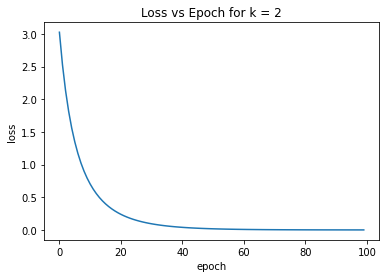

In [267]:
# Plotting the values of loss vs epoch for a specific value of K
plt.plot(range(num_epochs),Loss_list)
title = "Loss vs Epoch for k = {}".format(K)
plt.title(title)
plt.xlabel('epoch')
plt.ylabel('loss')

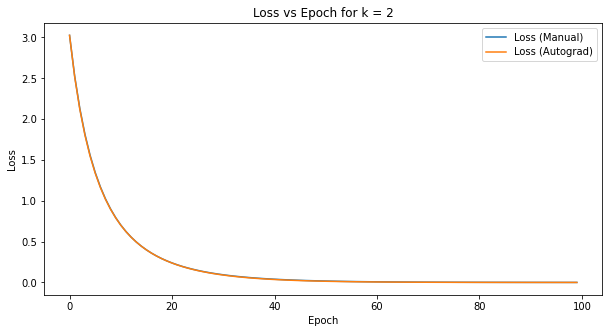

In [268]:
# Convert A, B, C, and x to PyTorch tensors
A = torch.tensor(A, requires_grad=True, dtype=torch.float32)
B = torch.tensor(B, requires_grad=True, dtype=torch.float32)
C = torch.tensor(C, requires_grad=True, dtype=torch.float32)
x = torch.tensor(x, dtype=torch.float32)

# Training loop using torch.autograd
Loss_list_autograd = []
for epoch in range(num_epochs):
    # Forward propagation using torch.autograd
    Ax = torch.matmul(A, x)
    Bx = torch.matmul(B, x)
    z = torch.sigmoid(Ax) + Bx
    w = torch.matmul(C, z)
    L = torch.sum(w ** 2)

    # Backpropagation using torch.autograd
    L.backward()

    # Extract gradients computed by torch.autograd
    gradient_A_autograd = A.grad
    gradient_B_autograd = B.grad
    gradient_C_autograd = C.grad

    # Gradient descent to update A, B, and C using torch.autograd
    with torch.no_grad():
        A -= learning_rate * gradient_A_autograd
        B -= learning_rate * gradient_B_autograd
        C -= learning_rate * gradient_C_autograd

    # Clear gradients
    A.grad = None
    B.grad = None
    C.grad = None

    # store the loss value for each epoch
    Loss_list_autograd.append(L.item())

# Compare the loss curves
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), Loss_list, label="Loss (Manual)")
plt.plot(range(num_epochs), Loss_list_autograd, label="Loss (Autograd)")
plt.xlabel("Epoch")
title = "Loss vs Epoch for k = {}".format(K)
plt.title(title)
plt.ylabel("Loss")
plt.legend()
plt.show()

In [269]:
A_manual

[[0.17067769980525724, 0.825242704206683],
 [0.14167562453269641, 0.11286244864826278]]

In [270]:
# value of optimized matrix A computed using a library
A

tensor([[0.0919, 0.7837],
        [0.1221, 0.1025]], requires_grad=True)

In [271]:
# value of optimized matrix B computed manualy
for row in B_manual:
    print(row)


[-0.2961448301383243, 0.1602296864912703]
[0.5543580275129282, 0.22671368629942973]


In [272]:
# value of optimized matrix B computed using a library
print(B)

tensor([[-0.3151,  0.1502],
        [ 0.5993,  0.2504]], requires_grad=True)


In [273]:
C_manual


[[0.5566777360953241, -0.19002991757473586],
 [0.17202466809325567, -0.05467312664022145]]

In [274]:
C

tensor([[ 0.5693, -0.1705],
        [ 0.1771, -0.0493]], requires_grad=True)